In [2]:
import pandas as pd
import numpy as np


In [3]:
import requests

In [5]:
 city='hanoi'
 r= requests.request("POST",f"http://localhost:9999/get_weather/{city}" )

In [6]:
import json
df=json.loads(r.content)

In [7]:
j={
    "ID": 1581130.0, 
    "ten": "iot", 
    "quoc_gia": "VN", 
    "kinh_do": 105.8412, 
    "vi_do": 21.0245, 
    "thoi_gian": [2022, 4, 18, 17, 39, 0, 0, 108], 
    "nhiet_do": 26.0, 
    "do_am": 63.0, 
    "ap_suat": 1006.0, 
    "huong_gio": 136.0, 
    "toc_do_gio": "5.67"}


In [10]:
import json
js=json.dumps(j)
jl=json.loads(js)
jl

{'ID': 1581130.0,
 'ten': 'iot',
 'quoc_gia': 'VN',
 'kinh_do': 105.8412,
 'vi_do': 21.0245,
 'thoi_gian': [2022, 4, 18, 17, 39, 0, 0, 108],
 'nhiet_do': 26.0,
 'do_am': 63.0,
 'ap_suat': 1006.0,
 'huong_gio': 136.0,
 'toc_do_gio': '5.67'}

In [13]:
import pandas as pd
thoi_gian=jl['thoi_gian']
# t=np.array(thoi_gian.replace("[","").replace("]","").split(", ")).astype(int)
t=thoi_gian
from datetime import datetime
d = datetime(t[0],t[1],t[2],t[3],t[4],t[5],)+ pd.Timedelta(hours=7)
d.strftime("%a %b %d %H:%M:%S %Y")

'Tue Apr 19 00:39:00 2022'

In [1]:
Sat Apr 16 18:01:02 2022


SyntaxError: invalid syntax (<ipython-input-1-2c87988e7c0a>, line 1)

In [20]:
da=pd.DataFrame(pd.Series(jl)).T
da

,ID,ten,quoc_gia,kinh_do,vi_do,thoi_gian,nhiet_do,do_am,ap_suat,huong_gio,toc_do_gio
0,1581130.0,iot,VN,105.8412,21.0245,"[2022, 4, 18, 17, 39, 0, 0, 108]",26.0,63.0,1006.0,136.0,5.67


In [8]:
da.thoi_gian=da.thoi_gian[:6]

In [14]:
t=j['thoi_gian']
t

'[2022, 4, 18, 17, 39, 0, 0, 108]'

In [6]:
import pandas as pd
data=pd.DataFrame(df,index=None)
data.thoi_gian= pd.to_datetime(data.thoi_gian)

In [7]:
df=data
list(df.nhiet_do)

[23.0, 22.0, 23.0, 22.0, 23.0, 24.0, 24.0, 25.0, 25.0, 25.0, 25.0, 23.0]

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# from keras.models import load_model
# Xay dung model LSTM
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (12,1),activation='sigmoid'))
model.add(Dropout(0.3))
# model.add(LSTM(units = 50, return_sequences = True,activation='sigmoid'))
# model.add(Dropout(0.3))
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.3))
model.add(LSTM(units = 50,activation='sigmoid', ))
model.add(Dropout(0.2))
model.add(Dense(units = 1))

opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = opt, loss = 'mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 12, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [9]:
model=keras.models.load_model('./weights/nhiet_do.h5')

In [10]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 12, 50)            10400     
                                                                 
 dropout_7 (Dropout)         (None, 12, 50)            0         
                                                                 
 lstm_22 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [11]:
from collections import deque
X=deque(list(df.nhiet_do), maxlen=12)

In [50]:
from collections import deque
X=deque(list(df.nhiet_do), maxlen=12)
y=[]
for i in range(6):
    p=(model.predict(np.array([list(X)]))[0][0])
    y.append(float(int(p)))
    X.append(p)

In [51]:
y


[21.0, 20.0, 18.0, 17.0, 16.0, 15.0]

In [13]:
# X.appendleft(model.predict(np.array([list(X)])))

In [14]:
model.predict(np.array([list(X)]))

array([[21.740032]], dtype=float32)

In [15]:
model.input_shape

(None, 12, 1)

In [16]:
keras.__version__

'2.8.0'

In [17]:
import numpy as np
t=np.array([list(X),list(X)])
t.shape

(2, 12)

In [18]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_21 (LSTM)              (None, 12, 50)            10400     
                                                                 
 dropout_7 (Dropout)         (None, 12, 50)            0         
                                                                 
 lstm_22 (LSTM)              (None, 50)                20200     
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.predict(t)

array([[21.740032],
       [21.740032]], dtype=float32)

In [20]:
t

array([[23., 22., 23., 22., 23., 24., 24., 25., 25., 25., 25., 23.],
       [23., 22., 23., 22., 23., 24., 24., 25., 25., 25., 25., 23.]])

In [24]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
regressor=keras.models.load_model("weights/nhiet_do.h5")
from collections import deque
X=deque([23.0, 22.0, 23.0, 22.0, 23.0, 24.0, 24.0, 25.0, 25.0, 25.0, 25.0, 23.0], maxlen=12)
X.append(int(regressor.predict(np.array([list(X)]))[0][0]))

In [25]:
X

deque([22.0, 23.0, 22.0, 23.0, 24.0, 24.0, 25.0, 25.0, 25.0, 25.0, 23.0, 21])

In [32]:
list(df.nhiet_do)min(.extend(y))

TypeError: 'NoneType' object is not iterable

[23.0, 22.0, 23.0, 22.0, 23.0, 24.0, 24.0, 25.0, 25.0, 25.0, 25.0, 23.0]
[21.0, 20.0, 18.0, 17.0, 16.0, 15.0]


(11.0, 29.0)

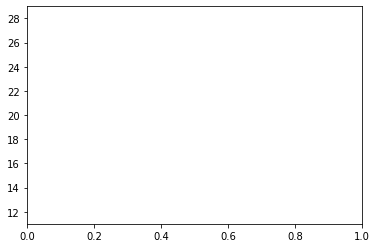

In [53]:
nhiet_do=list(df.nhiet_do)
print(nhiet_do)
print(y)
nhiet_do.extend(y)
plt.ylim(min(nhiet_do) - 4, max(nhiet_do) + 4)

In [38]:
y

[19, 17, 16, 15, 15, 14]

In [39]:
float(y)

TypeError: float() argument must be a string or a number, not 'list'

In [1]:
import pandas as pd

In [15]:
tran=pd.read_excel('thoitiet.xlsx')

In [16]:
tran.V.unique()

array(['Ít mây', 'Nhiều mây', 'Có sương mù', 'Trời nắng', 'Có mưa'],
      dtype=object)

In [18]:
label={}
for i in range(len(tran)):
    label[tran.E[i]]=tran.V[i]


In [19]:
label

{'Partly Cloudy': 'Ít mây',
 'Mostly Cloudy': 'Nhiều mây',
 'Overcast': 'Nhiều mây',
 'Foggy': 'Có sương mù',
 'Breezy and Mostly Cloudy': 'Nhiều mây',
 'Clear': 'Trời nắng',
 'Breezy and Partly Cloudy': 'Ít mây',
 'Breezy and Overcast': 'Nhiều mây',
 'Humid and Mostly Cloudy': 'Nhiều mây',
 'Humid and Partly Cloudy': 'Ít mây',
 'Windy and Foggy': 'Có sương mù',
 'Windy and Overcast': 'Nhiều mây',
 'Breezy and Foggy': 'Có sương mù',
 'Windy and Partly Cloudy': 'Ít mây',
 'Breezy': 'Trời nắng',
 'Dry and Partly Cloudy': 'Ít mây',
 'Windy and Mostly Cloudy': 'Nhiều mây',
 'Dangerously Windy and Partly Cloudy': 'Ít mây',
 'Dry': 'Trời nắng',
 'Windy': 'Trời nắng',
 'Humid and Overcast': 'Ít mây',
 'Light Rain': 'Có mưa',
 'Drizzle': 'Có mưa',
 'Windy and Dry': 'Trời nắng',
 'Dry and Mostly Cloudy': 'Nhiều mây',
 'Breezy and Dry': 'Trời nắng',
 'Rain': 'Có mưa'}

In [76]:
df=pd.read_csv('weatherHistory.csv')

In [77]:
 df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [78]:
df=df.rename(columns={'Formatted Date':'thoi_gian',"Summary": "thoi_tiet", "Temperature (C)": "nhiet_do",'Humidity':'do_am','Wind Speed (km/h)':'toc_do_gio','Wind Bearing (degrees)':'huong_gio','Pressure (millibars)':'ap_suat'})

In [79]:
df

,thoi_gian,thoi_tiet,Precip Type,nhiet_do,Apparent Temperature (C),do_am,toc_do_gio,huong_gio,Visibility (km),Loud Cover,ap_suat,Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [84]:
d=df[['nhiet_do','do_am','toc_do_gio','huong_gio','ap_suat','thoi_tiet']]
d.thoi_tiet=d.thoi_tiet.replace(label)
d.thoi_tiet.unique()
# d.thoi_gian=pd.to_datetime(d.thoi_gian, errors='coerce')
# d.info()

array(['Ít mây', 'Nhiều mây', 'Có sương mù', 'Trời nắng', 'Có mưa'],
      dtype=object)

In [85]:
d.thoi_gian.dt.hour

AttributeError: 'DataFrame' object has no attribute 'thoi_gian'

In [58]:
label

{'Partly Cloudy': 'Ít mây',
 'Mostly Cloudy': 'Nhiều mây',
 'Overcast': 'Nhiều mây',
 'Foggy': 'Có sương mù',
 'Breezy and Mostly Cloudy': 'Nhiều mây',
 'Clear': 'Trời nắng',
 'Breezy and Partly Cloudy': 'Ít mây',
 'Breezy and Overcast': 'Nhiều mây',
 'Humid and Mostly Cloudy': 'Nhiều mây',
 'Humid and Partly Cloudy': 'Ít mây',
 'Windy and Foggy': 'Có sương mù',
 'Windy and Overcast': 'Nhiều mây',
 'Breezy and Foggy': 'Có sương mù',
 'Windy and Partly Cloudy': 'Ít mây',
 'Breezy': 'Trời nắng',
 'Dry and Partly Cloudy': 'Ít mây',
 'Windy and Mostly Cloudy': 'Nhiều mây',
 'Dangerously Windy and Partly Cloudy': 'Ít mây',
 'Dry': 'Trời nắng',
 'Windy': 'Trời nắng',
 'Humid and Overcast': 'Ít mây',
 'Light Rain': 'Có mưa',
 'Drizzle': 'Có mưa',
 'Windy and Dry': 'Trời nắng',
 'Dry and Mostly Cloudy': 'Nhiều mây',
 'Breezy and Dry': 'Trời nắng',
 'Rain': 'Có mưa'}

In [60]:
d.to_csv('train.csv',index=False)

In [68]:
type(d.thoi_gian[0]).dt.hour

AttributeError: type object 'datetime.datetime' has no attribute 'dt'